In [40]:
import astropy
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import subprocess
import os

In [2]:
sed_sample = Table.read('data/bootes_cat.fits')

In [3]:
sed_sample

ALPHA_J2000,DELTA_J2000,FLAG_DEEP,CLASS_STAR,FLAG_OPT_CONTAM,FLAG_MIPS_CONTAM_2,NUV_mag_2,NUV_magerr_2,NUV_flux_2,NUV_fluxerr_2,u_mag_2,u_magerr_2,u_flux_2,u_fluxerr_2,Bw_mag_2,Bw_magerr_2,Bw_flux_2,Bw_fluxerr_2,R_mag_2,R_magerr_2,R_flux_2,R_fluxerr_2,I_mag_2,I_magerr_2,I_flux_2,I_fluxerr_2,z_mag_2,z_magerr_2,z_flux_2,z_fluxerr_2,z_Subaru_mag_2,z_Subaru_magerr_2,z_Subaru_flux_2,z_Subaru_fluxerr_2,y_mag_2,y_magerr_2,y_flux_2,y_fluxerr_2,J_mag_2,J_magerr_2,J_flux_2,J_fluxerr_2,H_mag_2,H_magerr_2,H_flux_2,H_fluxerr_2,K_mag_2,K_magerr_2,K_flux_2,K_fluxerr_2,Ks_mag_2,Ks_magerr_2,Ks_flux_2,Ks_fluxerr_2,ch1_mag_2,ch1_magerr_2,ch1_flux_2,ch1_fluxerr_2,ch2_mag_2,ch2_magerr_2,ch2_flux_2,ch2_fluxerr_2,ch3_mag_2,ch3_magerr_2,ch3_flux_2,ch3_fluxerr_2,ch4_mag_2,ch4_magerr_2,ch4_flux_2,ch4_fluxerr_2,24_mag_2,24_magerr_2,24_flux_2,24_fluxerr_2,FLAG_MIPS_CONTAM_3,NUV_mag_3,NUV_magerr_3,NUV_flux_3,NUV_fluxerr_3,u_mag_3,u_magerr_3,u_flux_3,u_fluxerr_3,Bw_mag_3,Bw_magerr_3,Bw_flux_3,Bw_fluxerr_3,R_mag_3,R_magerr_3,R_flux_3,R_fluxerr_3,I_mag_3,I_magerr_3,I_flux_3,I_fluxerr_3,z_mag_3,z_magerr_3,z_flux_3,z_fluxerr_3,z_Subaru_mag_3,z_Subaru_magerr_3,z_Subaru_flux_3,z_Subaru_fluxerr_3,y_mag_3,y_magerr_3,y_flux_3,y_fluxerr_3,J_mag_3,J_magerr_3,J_flux_3,J_fluxerr_3,H_mag_3,H_magerr_3,H_flux_3,H_fluxerr_3,K_mag_3,K_magerr_3,K_flux_3,K_fluxerr_3,Ks_mag_3,Ks_magerr_3,Ks_flux_3,Ks_fluxerr_3,ch1_mag_3,ch1_magerr_3,ch1_flux_3,ch1_fluxerr_3,ch2_mag_3,ch2_magerr_3,ch2_flux_3,ch2_fluxerr_3,ch3_mag_3,ch3_magerr_3,ch3_flux_3,ch3_fluxerr_3,ch4_mag_3,ch4_magerr_3,ch4_flux_3,ch4_fluxerr_3,24_mag_3,24_magerr_3,24_flux_3,24_fluxerr_3,FLAG_MIPS_CONTAM_4,NUV_mag_4,NUV_magerr_4,NUV_flux_4,NUV_fluxerr_4,u_mag_4,u_magerr_4,u_flux_4,u_fluxerr_4,Bw_mag_4,Bw_magerr_4,Bw_flux_4,Bw_fluxerr_4,R_mag_4,R_magerr_4,R_flux_4,R_fluxerr_4,I_mag_4,I_magerr_4,I_flux_4,I_fluxerr_4,z_mag_4,z_magerr_4,z_flux_4,z_fluxerr_4,z_Subaru_mag_4,z_Subaru_magerr_4,z_Subaru_flux_4,z_Subaru_fluxerr_4,y_mag_4,y_magerr_4,y_flux_4,y_fluxerr_4,J_mag_4,J_magerr_4,J_flux_4,J_fluxerr_4,H_mag_4,H_magerr_4,H_flux_4,H_fluxerr_4,K_mag_4,K_magerr_4,K_flux_4,K_fluxerr_4,Ks_mag_4,Ks_magerr_4,Ks_flux_4,Ks_fluxerr_4,ch1_mag_4,ch1_magerr_4,ch1_flux_4,ch1_fluxerr_4,ch2_mag_4,ch2_magerr_4,ch2_flux_4,ch2_fluxerr_4,ch3_mag_4,ch3_magerr_4,ch3_flux_4,ch3_fluxerr_4,ch4_mag_4,ch4_magerr_4,ch4_flux_4,ch4_fluxerr_4,24_mag_4,24_magerr_4,24_flux_4,24_fluxerr_4,ID_OPTICAL,FLAG_MIPS_CONTAM,IMAFLAGS_APER_1,SEGFLAGS_APER_1,FUV_mag_2,FUV_magerr_2,FUV_flux_2,FUV_fluxerr_2,IMAFLAGS_APER_2,SEGFLAGS_APER_2,FUV_mag_3,FUV_magerr_3,FUV_flux_3,FUV_fluxerr_3,IMAFLAGS_APER_3,SEGFLAGS_APER_3,FUV_mag_4,FUV_magerr_4,FUV_flux_4,FUV_fluxerr_4,ID_SPITZER,ID,z_spec,IRAGN,XrayAGN,AGN,Sv_150,Sverr_150,VClass,radio,EBV,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,xID24_ID,F24,e_F24,F250,e_F250,et_F250,chi250,F350,e_F350,et_F350,chi350,F500,e_F500,et_F500,chi500,index_spitzer,gID,gSize,bkg250,bkg350,bkg500,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,lr_i,lr_dist_i,lr_index_i
deg,deg,,,,,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,uJy,uJy,,,,,,,uJy,uJy,,,,,uJy,uJy,,,,,uJy,

In [4]:
sed_sample.rename_column('z1_median','redshift')
sed_sample.rename_column('e_F24','et_F24')

In [5]:
for name in sed_sample.colnames:
    if 'mag' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if '_2' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if '_4' in name:
        sed_sample.remove_column(name)

for name in sed_sample.colnames:
    if 'FLAG' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if 'AGN' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if 'bkg' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if 'e_F' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if 'z1_' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if 'z2_' in name:
        sed_sample.remove_column(name)
        
for name in sed_sample.colnames:
    if 'chi' in name:
        sed_sample.remove_column(name)

In [6]:
sed_sample

ALPHA_J2000,DELTA_J2000,CLASS_STAR,NUV_flux_3,NUV_fluxerr_3,u_flux_3,u_fluxerr_3,Bw_flux_3,Bw_fluxerr_3,R_flux_3,R_fluxerr_3,I_flux_3,I_fluxerr_3,z_flux_3,z_fluxerr_3,z_Subaru_flux_3,z_Subaru_fluxerr_3,y_flux_3,y_fluxerr_3,J_flux_3,J_fluxerr_3,H_flux_3,H_fluxerr_3,K_flux_3,K_fluxerr_3,Ks_flux_3,Ks_fluxerr_3,ch1_flux_3,ch1_fluxerr_3,ch2_flux_3,ch2_fluxerr_3,ch3_flux_3,ch3_fluxerr_3,ch4_flux_3,ch4_fluxerr_3,24_flux_3,24_fluxerr_3,ID_OPTICAL,FUV_flux_3,FUV_fluxerr_3,ID_SPITZER,ID,z_spec,Sv_150,Sverr_150,VClass,radio,EBV,redshift,xID24_ID,F24,et_F24,F250,et_F250,F350,et_F350,F500,et_F500,index_spitzer,gID,gSize,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,lr_i,lr_dist_i,lr_index_i
deg,deg,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,,uJy,uJy,,,,,,,,,,,uJy,uJy,mJy,mJy,mJy,mJy,mJy,mJy,,,,,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,Jy / beam,Jy / beam,,,,
float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64,float64,int64,bool,float64,float64,bytes50,float64,float64,float64,float64,float64,float64,float64,float64,bytes100,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,int64
218.0872245,33.0009282,0.02,-0.0663089230657,0.0246586818248,0.387006103992,0.0539577677846,0.418919891119,0.037372585386,0.742329478264,0.0820935219526,1.19319498539,0.149125903845,0.602002084255,0.786893129349,1.83260297775,0.196278110147,1.65847957134,0.507012546062,4.20977687836,0.878838121891,5.46845293045,2.15884327888,-99.0,-99.0,8.09645843506,2.53851175308,30.0955219269,0.461971431971,39.7209091187,0.661406815052,58.8266639709,2.24755311012,54.8223800659,2.45073270798,881.560180664,21.6569271088,320534,nan,nan,--,320533,-99.0,0.00102865657985,0.000242422069883,1,True,0.00863,1.7875,HerMES-xID24-463051,956.9876,15.2615,93.616356,4.8503513,81.32193,6.77791,47.949524,9.596094,120313,27469,670,18189,18511,218.087298036,4.81739291277e-05,33.0008535151,4.44183743862e-05,0.0013036022896,0.000120933719564,0.00102988250784,5.94125714081e-05,218.087298036,4.81739291277e-05,33.0008535151,4.44183743862e-05,0.00196940476816,0.000118658102179,0.00178594874873,9.86479144235e-05,121.806680178,25.2071923486,0.00196924626572,0.000118658102179,0.00178547963621,9.86479144235e-05,121.75911664,25.2071923486,0.00104896624565,0.000118658102179,0.000640605425006,9.86479144235e-05,121.806680178,25.2071923486,0.00104888182236,0.000118658102179,0.000640437158148,9.86479144235e-05,121.75911664,25.2071923486,0.00133486877226,9.96488268718e-05,5.66985945625e-05,0.0,2.5023426133e-05,2.7226894872e-06,S,141.919785588,0.34868458591,320533
218.7294723,33.0020796,0.03,-99.0,-99.0,-99.0,-99.0,3.29436922073,0.0432018004358,8.46675395966,0.0766943320632,15.3458871841,0.171221852303,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,30.6238460541,0.818335

In [7]:
for name in sed_sample.colnames:
    if '_flux_' in name:
        sed_sample.rename_column(name,name.replace('_flux_','_'))
    if '_fluxerr' in name:
        sed_sample.rename_column(name,name.replace('_flux','_'))

for name in sed_sample.colnames:
    sed_sample.rename_column(name,name.replace('_3',''))

for name in sed_sample.colnames:
    if 'et_' in name:
        sed_sample.rename_column(name,name[3:]+'_err')

sed_sample.rename_column('ID','id')

In [8]:
for name in sed_sample.colnames:
    if str(sed_sample[name].unit) == 'ujy':
        col = Column(data=sed_sample[name]/1000, name=name, unit='mJy')
        sed_sample.remove_column(name)
        sed_sample.add_column(col)

In [9]:
for name in sed_sample.colnames:
    if str(sed_sample[name].unit) == 'uJy':
        sed_sample[name] = sed_sample[name]/1000

In [16]:
mask = sed_sample['z_spec']>=0
sed_sample[mask]

ALPHA_J2000,DELTA_J2000,CLASS_STAR,NUV,NUV_err,u,u_err,Bw,Bw_err,R,R_err,I,I_err,z,z_err,z_Subaru,z_Subaru_err,y,y_err,J,J_err,H,H_err,K,K_err,Ks,Ks_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err,24,24_err,ID_OPTICAL,FUV,FUV_err,ID_SPITZER,id,z_spec,Sv_150,Sverr_150,VClass,radio,EBV,redshift,xID24_ID,F24,F24_err,F250,F250_err,F350,F350_err,F500,F500_err,index_spitzer,gID,gSize,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,lr_i,lr_dist_i,lr_index_i
deg,deg,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,,uJy,uJy,,,,,,,,,,,uJy,uJy,mJy,mJy,mJy,mJy,mJy,mJy,,,,,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,Jy / beam,Jy / beam,,,,
float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64,float64,int64,bool,float64,float64,bytes50,float64,float64,float64,float64,float64,float64,float64,float64,bytes100,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,int64
218.6420374,33.0129362,0.03,-0.099,-0.099,-0.099,-0.099,0.0121018295288,4.21946085989e-05,0.090606086731,0.000133057117462,0.138392196655,0.000179965361953,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,0.294645202637,0.000695913314819,0.340051116943,0.00167620825768,-0.099,-0.099,0.416231658936,0.00273417067528,0.188634643555,0.000445220977068,0.156681915283,0.000839240789413,0.109691894531,0.00340014648437,0.230801116943,0.00271906709671,1.18198449707,0.0290293807983,325730,--,--,--,325729,0.2448,nan,nan,--,False,0.00932,0.2237,HerMES-xID24-475385,1.3938561,0.0208532,26.293488,4.968251,12.946154,6.7987123,5.485644,4.96946,123019,28926,157,12889,13126,218.641955614,6.82506006411e-05,33.0128109375,0.000103297319702,0.000696016352432,0.000117894574786,0.000546751219409,5.7418986932e-05,218.641955614,6.82506006411e-05,33.0128109375,0.000103297319702,0.00210292339644,0.00024363906566,0.00168216621827,0.000160131564949,176.102712938,21.7887877839,0.0021022577819,0.00024363906566,0.00168205895454,0.000160131564949,175.752843593,21.7887877839,0.00128169799919,0.00024363906566,0.000227048723588,0.000160131564949,176.102712938,21.7887877839,0.00128129231786,0.00024363906566,0.000227034245796,0.000160131564949,175.752843593,21.7887877839,0.000605002752815,7.66308910085e-05,5.51523444301e-05,0.0,2.68609965133e-05,7.258663004e-07,S,264.617262623,0.514108095875,325729
218.6514281,33.0165146,0.03,-0.099,-0.099,-0.099,-0.099,0.029477563858,4.29287366569e-05,0.123696365356,0.000129275873303,0.18086378479,0.000189205631614,-0.099,-0.099,-0.099,-0.099,-0.099,-0.099,0.410789520264,0.000761067807674,0.492339355469,0.00192019355297,-0.099,-0.099,0.540324279785,0.00248166823387,0.3270859375,0.000433397054672,0.251407867432,0.000826945185661,0.360723327637,0.00300262188911,3.05097045898,0.00270519423485,2.84584790039,0.0340484008789,327223,--,--,--,327222,0.08

In [68]:
Table.write(sed_sample,'data/bootes_sed_sample_for_cigale.fits',format='fits')

convert the filter names to match the column names

In [106]:
glob.glob('data/filters/LOFAR-Deep-BootesFilters/*')

['data/filters/LOFAR-Deep-BootesFilters/pacs_green.dat',
 'data/filters/LOFAR-Deep-BootesFilters/pacs_red.dat',
 'data/filters/LOFAR-Deep-BootesFilters/F250.dat',
 'data/filters/LOFAR-Deep-BootesFilters/F350.dat',
 'data/filters/LOFAR-Deep-BootesFilters/F500.dat',
 'data/filters/LOFAR-Deep-BootesFilters/u.filter',
 'data/filters/LOFAR-Deep-BootesFilters/y.filter',
 'data/filters/LOFAR-Deep-BootesFilters/I.dat',
 'data/filters/LOFAR-Deep-BootesFilters/K.dat',
 'data/filters/LOFAR-Deep-BootesFilters/z.dat',
 'data/filters/LOFAR-Deep-BootesFilters/Bw.dat',
 'data/filters/LOFAR-Deep-BootesFilters/H.dat',
 'data/filters/LOFAR-Deep-BootesFilters/Ks.dat',
 'data/filters/LOFAR-Deep-BootesFilters/R.dat',
 'data/filters/LOFAR-Deep-BootesFilters/J.dat',
 'data/filters/LOFAR-Deep-BootesFilters/z_Subaru.dat',
 'data/filters/LOFAR-Deep-BootesFilters/ch1.dat',
 'data/filters/LOFAR-Deep-BootesFilters/ch2.dat',
 'data/filters/LOFAR-Deep-BootesFilters/ch3.dat',
 'data/filters/LOFAR-Deep-BootesFilters/ch

subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/spire_250.dat','data/filters/LOFAR-Deep-BootesFilters/F250.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/spire_350.dat','data/filters/LOFAR-Deep-BootesFilters/F350.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/spire_500.dat','data/filters/LOFAR-Deep-BootesFilters/F500.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/subaru_z.filter','data/filters/LOFAR-Deep-BootesFilters/z_Subaru.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/IRAC_ch1_total_response.filter','data/filters/LOFAR-Deep-BootesFilters/ch1.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/IRAC_ch2_total_response.filter','data/filters/LOFAR-Deep-BootesFilters/ch2.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/IRAC_ch3_total_response.filter','data/filters/LOFAR-Deep-BootesFilters/ch3.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/IRAC_ch4_total_response.filter','data/filters/LOFAR-Deep-BootesFilters/ch4.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/mips24.filter','data/filters/LOFAR-Deep-BootesFilters/F24.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/galexFUV.filter','data/filters/LOFAR-Deep-BootesFilters/FUV.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/galexNUV.filter','data/filters/LOFAR-Deep-BootesFilters/NUV.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/U.filter','data/filters/LOFAR-Deep-BootesFilters/u.dat'])
subprocess.call(['mv','data/filters/LOFAR-Deep-BootesFilters/Y.filter','data/filters/LOFAR-Deep-BootesFilters/y.dat'])

In [85]:
filter_list = glob.glob('data/filters/LOFAR-Deep-BootesFilters/*')

In [92]:
fils = ''
for fil in filter_list:
    print(fil[38:])
    fil = fil[38:]
    fil = fil.replace('.filter','')
    fil = fil.replace('.dat','')
    fils = fils + fil +', ' + fil+'_err, '

U.filter
Y.filter
I.filter
K.filter
z.filter
Bw.filter
H.filter
Ks.filter
R.filter
J.filter
pacs_green.dat
pacs_red.dat
F250.dat
F350.dat
F500.dat
z_Subaru.filter
ch1.filter
ch2.filter
ch3.filter
ch4.filter
F24.filter
FUV.filter
NUV.filter


In [93]:
fils

'U, U_err, Y, Y_err, I, I_err, K, K_err, z, z_err, Bw, Bw_err, H, H_err, Ks, Ks_err, R, R_err, J, J_err, pacs_green, pacs_green_err, pacs_red, pacs_red_err, F250, F250_err, F350, F350_err, F500, F500_err, z_Subaru, z_Subaru_err, ch1, ch1_err, ch2, ch2_err, ch3, ch3_err, ch4, ch4_err, F24, F24_err, FUV, FUV_err, NUV, NUV_err, '

In [105]:
for fil in filter_list:
    if '.filter' in fil:
        subprocess.call(['mv',fil,fil[:-7]+'.dat'])

In [94]:
Table.write(sed_sample,'data/bootes_sed_sample_for_cigale.fits',format='fits',overwrite=True)

In [104]:
filter_list[0][:-7]

'data/filters/LOFAR-Deep-BootesFilters/U'

In [107]:
small_table = sed_sample[:10]

In [114]:
Table.write(small_table,'data/sample_of_sample.fits',format('fits'))

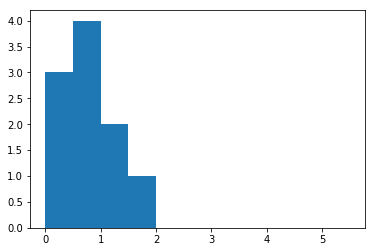

In [110]:
y = sed_sample['redshift']
bins = np.arange(0,6,0.5)
plt.hist(y,bins=bins)
plt.show()

In [53]:
ini_template = open('pcigale.ini','r')
bins = np.arange(0,6,0.1)
for n in range(len(bins)-1):
    mask = (sed_sample['redshift']>bins[n]) & (sed_sample['redshift']<bins[n+1])
    if np.sum(mask)>0:
        mask_table = sed_sample[mask]
        folder_name = '{}_z_{}'.format(str(bins[n])[:4],str(bins[n+1])[:4])
        fname = 'lofar_sample_cigale_z_{}_to_{}.fits'.format(str(bins[n])[:4],str(bins[n+1])[:4])
        
        os.mkdir('data/cigale_results/sample/{}'.format(folder_name))

        Table.write(mask_table,'data/cigale_results/sample/{}/{}'.format(folder_name,fname),format='fits',overwrite=True)
        
        ini_template.seek(0)
        new_ini = open('data/cigale_results/sample/{}/pcigale.ini'.format(folder_name),'w+') 
        #create a blank pcigale.ini.spec file so it doesn't crash
        new_ini_spec = open('data/cigale_results/sample/{}/pcigale.ini.spec'.format(folder_name),'w+')
        for line in ini_template:
            if 'data_file' in line:
                line = 'data_file = {}'.format(fname)
                print(line)
            new_ini.write(line)
        new_ini.close()
ini_template.close()

data_file = lofar_sample_cigale_z_0.0_to_0.1.fits
data_file = lofar_sample_cigale_z_0.1_to_0.2.fits
data_file = lofar_sample_cigale_z_0.2_to_0.3.fits
data_file = lofar_sample_cigale_z_0.3_to_0.4.fits
data_file = lofar_sample_cigale_z_0.4_to_0.5.fits
data_file = lofar_sample_cigale_z_0.5_to_0.6.fits
data_file = lofar_sample_cigale_z_0.6_to_0.7.fits
data_file = lofar_sample_cigale_z_0.7_to_0.8.fits
data_file = lofar_sample_cigale_z_0.8_to_0.9.fits
data_file = lofar_sample_cigale_z_0.9_to_1.0.fits
data_file = lofar_sample_cigale_z_1.0_to_1.1.fits
data_file = lofar_sample_cigale_z_1.1_to_1.2.fits
data_file = lofar_sample_cigale_z_1.2_to_1.3.fits
data_file = lofar_sample_cigale_z_1.3_to_1.4.fits
data_file = lofar_sample_cigale_z_1.4_to_1.5.fits
data_file = lofar_sample_cigale_z_1.5_to_1.6.fits
data_file = lofar_sample_cigale_z_1.6_to_1.7.fits
data_file = lofar_sample_cigale_z_1.7_to_1.8.fits
data_file = lofar_sample_cigale_z_1.8_to_1.9.fits
data_file = lofar_sample_cigale_z_1.9_to_2.0.fits


In [21]:
mask = sed_sample['z_spec']>=0
zspec_sample = sed_sample[mask].copy()
zspec_sample.remove_column('redshift')
zspec_sample.rename_column('z_spec','redshift')

bins = np.arange(0,8,1)
for n in range(len(bins)-1):
    mask = (zspec_sample['redshift']>bins[n]) & (zspec_sample['redshift']<bins[n+1])
    if np.sum(mask)>0:
        mask_table = zspec_sample[mask]
        Table.write(mask_table,'data/cigale_results/sample/lofar_sample_cigale_zspec_{}_to_{}.fits'.format(bins[n],bins[n+1]),format='fits',overwrite=True)


In [39]:
f = open("pcigale.ini","r")
test = open("test.ini",'w+')
for line in f:
    if 'data_file' in line:
        line = 'test.fits'
    test.write(line)
test.close()
f.close()

In [35]:
len(line)

18